In [1]:
import glob
import json
import os
from typing import Optional

import pandas as pd

## Creating the "Landing Zone"

In [2]:
def get_df_from_json_folder(folder: str, dtypes: Optional[dict] = None) -> pd.DataFrame:
    """Get dataframe from a folder containing json"""
    # Create an empty list to hold the DataFrames
    data = []

    # Loop over all JSON files in the folder
    for filename in glob.glob(f"{folder}/*.json"):
        with open(filename, 'r') as f:
            # Read the file and create a list of dictionaries from the weirdly formed JSON objects
            combined_json_data = (
                f.read()
                .replace(",\n","")
                .replace("\n", "")
                .replace("}{", "}-},{-{")
                .split("-},{-")
            )
            for json_data in combined_json_data:
                try:
                    dictionnairy = json.loads(json_data)
                    data.append(dictionnairy)
                except json.decoder.JSONDecodeError:
                    print(f".{filename}")
                    print(json_data)
                    continue

    df = pd.DataFrame(data)

    if dtypes is not None:
        for column, dtype in dtypes.items():
            df[column] = df[column].astype(dtype)

    return df

In [3]:
customer_landing_df = get_df_from_json_folder(
    './project/starter/customer', 
    dtypes={
        "customerName": "string",
        "email": "string",
        "phone": "Int64",
        "birthDay": "string",
        "serialNumber": "string",
        "registrationDate": "Int64",
        "lastUpdateDate": "Int64",
        "shareWithResearchAsOfDate": "Int64",
        "shareWithFriendsAsOfDate": "Int64",
        "shareWithPublicAsOfDate": "Int64",
    }
)

customer_landing_df.head(5)

,customerName,email,phone,birthDay,serialNumber,registrationDate,lastUpdateDate,shareWithResearchAsOfDate,shareWithPublicAsOfDate,shareWithFriendsAsOfDate
0,Frank Doshi,Frank.Doshi@test.com,8015551212,1965-01-01,159a908a-371e-40c1-ba92-dcdea483a6a2,1655293787680,1655293787680,1655293787680,1655293787680,<NA>
1,Trevor Lincoln,Trevor.Lincoln@test.com,8015551212,1964-01-01,2bc01cbe-2ea2-4603-b91a-5989b915d392,1655293788365,1655293788365,1655293788365,<NA>,1655293788365
2,Sean Clayton,Sean.Clayton@test.com,8015551212,1963-01-01,fc868710-172e-408b-895d-ba0a5406e4da,1655293788443,1655293788443,1655293788443,<NA>,1655293788443
3,Neeraj Anandh,Neeraj.Anandh@test.com,8015551212,1962-01-01,2bc01cbe-2ea2-4603-b91a-5989b915d392,1655293788530,1655293788530,<NA>,1655293788530,1655293788530
4,Travis Spencer,Travis.Spencer@test.com,8015551212,1961-01-01,94867fb9-570d-4031-b319-8a9d3b8c1c20,1655293788631,1655293788631,1655293788631,<NA>,<NA>


In [4]:
accelerometer_landing_df = get_df_from_json_folder(
    './project/starter/accelerometer',
    dtypes={
        "user": "string",
        "timeStamp": "Int64",
        "x": "float64",
        "y": "float64",
        "z": "float64",
    }
)

accelerometer_landing_df.head(5)

,user,timeStamp,x,y,z
0,Sarah.Jefferson@test.com,1655564090238,1.0,-1.0,-1.0
1,Sarah.Jefferson@test.com,1655564090238,0.0,-1.0,0.0
2,Sarah.Jefferson@test.com,1655564090238,1.0,-1.0,0.0
3,Sarah.Jefferson@test.com,1655564092471,1.0,0.0,0.0
4,Sarah.Jefferson@test.com,1655564092471,0.0,1.0,0.0


In [5]:
step_trainer_landing_df = get_df_from_json_folder(
    './project/starter/step_trainer',
    dtypes={
        "sensorReadingTime": "Int64",
        "serialNumber": "string",
        "distanceFromObject": "int",
    }
)

step_trainer_landing_df.head(5)

,sensorReadingTime,serialNumber,distanceFromObject
0,1655562565701,b4badf1b-6837-4bc2-b932-33c860549c8e,238
1,1655562569167,b4badf1b-6837-4bc2-b932-33c860549c8e,270
2,1655562572633,b4badf1b-6837-4bc2-b932-33c860549c8e,223
3,1655562576099,b4badf1b-6837-4bc2-b932-33c860549c8e,234
4,1655562579565,b4badf1b-6837-4bc2-b932-33c860549c8e,287


In [6]:
(
    customer_landing_df
    [
        customer_landing_df[["customerName", "serialNumber"]].duplicated(keep=False) 
        # & customer_landing_df["serialNumber"].isin(step_trainer_landing_df["serialNumber"].unique()) 
        # & customer_landing_df["email"].isin(accelerometer_landing_df["user"].unique())
    ]
    .sort_values("customerName")
    [["email", "serialNumber", "shareWithResearchAsOfDate", "birthDay"]]
)

,email,serialNumber,shareWithResearchAsOfDate,birthDay
35,Angie.Davis@test.com,f3161efa-b3ab-49db-8561-f23e1ffc791f,<NA>,1930-01-01
278,Angie.Davis@test.com,f3161efa-b3ab-49db-8561-f23e1ffc791f,1655293798268,1687-01-01
221,Ashley.Aristotle@test.com,5dd97793-c30e-4b8c-b73f-e4132914495f,1655293796429,1744-01-01
500,Ashley.Aristotle@test.com,5dd97793-c30e-4b8c-b73f-e4132914495f,<NA>,1465-01-01
86,Bobby.Clark@test.com,54b577cf-bb80-4019-9e1c-5f9c53c4745f,1655293791716,1879-01-01
719,Bobby.Clark@test.com,54b577cf-bb80-4019-9e1c-5f9c53c4745f,<NA>,1246-01-01
300,Bobby.Clark@test.com,54b577cf-bb80-4019-9e1c-5f9c53c4745f,1655293798996,1665-01-01
877,Chris.Habschied@test.com,51fe4a0b-84bf-4fd8-ac10-638481219601,<NA>,1088-01-01
428,Chris.Habschied@test.com,51fe4a0b-84bf-4fd8-ac10-638481219601,<NA>,1537-01-01
694,Christina.Anandh@test.com,938516ed-1680-49f5-993a-6187bf0a1eab,<NA>,1271-01-01


### Some exploration before we start...
#### Customer data

From the analysis below, we learn that:
- There are 999 entries in the dataset.
    - There are 609 unique `customerName` values as strings containing Prename and Name (e.g. "Frank Doshi") with no missing values
    - There are 609 unique `email` values as strings containing the `customerName` and a made up domain name ("test.com") (e.g. "Frank.Doshi@test.com") with no missing values
    - There is only one `phone` number (8015551212) with no missing values
    - There are 999 unique `birthDay` values as strings (e.g. "1965-01-01") with no missing values. The birth days for each row are simply counting down a year for every row (so going down from the year 1965 to 966)
    - There are 30 unique `serialNumber` values as strings (e.g. "159a908-371e-40c1-ba92-dcdea483a6a2") with no missing values, however there is not a single `serialNumber` that is unique to a single `customerName` (or `email`) value.
    - The date-like columns `registrationDate`, `lastUpdateDate`, `shareWithResearchAsOfDate`, `shareWithPublicAsOfDate`, and `shareWithFriendsAsOfDate` are all numbers representing a time around 2022-06-15 11:50 plus/minus a few seconds, whit no consisting order. Whilst `registrationDate` and `lastUpdateDate` are not missing for any row, the other three columns are missing for approx. half of the rows.
- There are 999 customers in the dataset, 497 of which agreed to share their data with research.
- There is no explicit unique identifier for customers, so we have to wrap out heads around how to identify them, already knowing that we later need the `email` and the `serialNumber` to match them to the other datasets.
    - The `email` field is just a combination of the `customerName` with a made up domain name ("test.com").
    - There are only 609 unique `customerName` and `email` values.
    - There are only 30 unique `serialNumber` values.

In [176]:
# Describe the data
customer_landing_df.describe(include="all", datetime_is_numeric=True).T.fillna("-")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerName,999.0,609,Larry Mitra,6,-,-,-,-,-,-,-
email,999.0,609,Larry.Mitra@test.com,6,-,-,-,-,-,-,-
phone,999.0,1,8015551212,999,-,-,-,-,-,-,-
birthDay,999.0,999,1965-01-01,1,-,-,-,-,-,-,-
serialNumber,999.0,30,51fe4a0b-84bf-4fd8-ac10-638481219601,44,-,-,-,-,-,-,-
registrationDate,999.0,-,-,-,1655293805820.804688,9962.589029,1655293787680.0,1655293797339.0,1655293805595.0,1655293814124.0,1655293823619.0
lastUpdateDate,999.0,-,-,-,1655293805820.804688,9962.589029,1655293787680.0,1655293797339.0,1655293805595.0,1655293814124.0,1655293823619.0
shareWithResearchAsOfDate,497.0,-,-,-,1655293805818.851074,10107.695821,1655293787680.0,1655293797353.0,1655293805694.0,1655293814070.0,1655293823619.0
shareWithPublicAsOfDate,503.0,-,-,-,1655293805746.554688,9895.615225,1655293787680.0,1655293797252.0,1655293805694.0,1655293813632.0,1655293823444.0
shareWithFriendsAsOfDate,490.0,-,-,-,1655293805795.253174,9750.519713,1655293788365.0,1655293797665.25,1655293806038.0,1655293813759.0,1655293823586.0


In [227]:
# Prepare dataframe for analysing email details
emails_df = pd.DataFrame(
    data=customer_landing_df["email"].str.replace(".", " ").str.split("@", expand=True).values,
    columns=["name", "domain"]
)
emails_df.head()

/var/folders/3k/5_m96q593d9g271nkd0v_bl80000gn/T/ipykernel_62155/4048281861.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data=customer_landing_df["email"].str.replace(".", " ").str.split("@", expand=True).values,


,name,domain
0,Frank Doshi,test com
1,Trevor Lincoln,test com
2,Sean Clayton,test com
3,Neeraj Anandh,test com
4,Travis Spencer,test com


In [228]:
# Is the name always the same as the customerName?
(customer_landing_df["customerName"] == emails_df["name"]).all()

True

In [229]:
# Is the domain always the same?
emails_df["domain"].nunique() == 1

True

In [12]:
# Prepare dataframe for analysing birth day details
birth_days = pd.DataFrame(
    customer_landing_df["birthDay"].str.split("-", expand=True).astype(int).values,
    columns=["Year", "Month", "Day"]
)

birth_days.head(5)

,Year,Month,Day
0,1965,1,1
1,1964,1,1
2,1963,1,1
3,1962,1,1
4,1961,1,1


In [14]:
# How is the birth day date distributed?
birth_days.describe(include="all", datetime_is_numeric=True).T.fillna("-")

,count,mean,std,min,25%,50%,75%,max
Year,999.0,1466.0,288.530761,967.0,1216.5,1466.0,1715.5,1965.0
Month,999.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
Day,999.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0


In [20]:
# Given only 30 unique values for serialNumber, how often do they appear?
customer_landing_df["serialNumber"].value_counts()

51fe4a0b-84bf-4fd8-ac10-638481219601    44
773b5821-b992-4307-b738-d511b9e0a406    42
54b577cf-bb80-4019-9e1c-5f9c53c4745f    40
f831cb34-4ef3-42cf-9ee7-a0240b515f33    38
41e55307-c7c3-4a9a-a607-61a8c1038456    38
938516ed-1680-49f5-993a-6187bf0a1eab    37
94867fb9-570d-4031-b319-8a9d3b8c1c20    37
5dd97793-c30e-4b8c-b73f-e4132914495f    36
2e34a651-5e26-4280-b30b-9f2066496a89    35
bdfc0926-a6cb-4567-8798-fd003dd5fadf    35
159a908a-371e-40c1-ba92-dcdea483a6a2    35
2bc01cbe-2ea2-4603-b91a-5989b915d392    35
f3161efa-b3ab-49db-8561-f23e1ffc791f    34
b8a9332d-39f7-4994-a299-d60a747d288b    34
fc868710-172e-408b-895d-ba0a5406e4da    33
a6cd85aa-09fa-4e9c-b28d-38881f6efc3c    33
a9c6b46b-01d8-4f86-a8ed-b1bde922932e    33
5fe9200a-fd9b-4c09-9037-9ed5d14d6f6a    33
bbff8516-ac15-4c1e-8215-df921995e043    33
4ad3c0da-38a9-48f9-9d99-766a717a774c    33
74db2795-a19f-48c6-bc20-a8660525dad3    32
9c0b4b10-9fb4-4a5c-9f69-7a6c796f1256    31
17486ebd-4c5d-4e84-b592-d1765bacf628    31
4215444e-74

In [21]:
# Prepare dataframe for analysing details for the time-like columns
timelike_cols = ["registrationDate", "lastUpdateDate", "shareWithResearchAsOfDate", "shareWithFriendsAsOfDate", "shareWithPublicAsOfDate"]
times_df = pd.DataFrame(
    data=customer_landing_df[timelike_cols].values,
    columns=timelike_cols,
)

for column in timelike_cols:
    times_df[column] = pd.to_datetime(times_df[column], unit='ms')

# Show some data
times_df.head()

,registrationDate,lastUpdateDate,shareWithResearchAsOfDate,shareWithFriendsAsOfDate,shareWithPublicAsOfDate
0,2022-06-15 11:49:47.680,2022-06-15 11:49:47.680,2022-06-15 11:49:47.680,NaT,2022-06-15 11:49:47.680
1,2022-06-15 11:49:48.365,2022-06-15 11:49:48.365,2022-06-15 11:49:48.365,2022-06-15 11:49:48.365,NaT
2,2022-06-15 11:49:48.443,2022-06-15 11:49:48.443,2022-06-15 11:49:48.443,2022-06-15 11:49:48.443,NaT
3,2022-06-15 11:49:48.530,2022-06-15 11:49:48.530,NaT,2022-06-15 11:49:48.530,2022-06-15 11:49:48.530
4,2022-06-15 11:49:48.631,2022-06-15 11:49:48.631,2022-06-15 11:49:48.631,NaT,NaT


In [231]:
# Describe the data
times_df.describe(include="all", datetime_is_numeric=True, percentiles=[]).T.fillna("-")

,count,mean,min,50%,max
registrationDate,999,2022-06-15 11:50:05.820804864,2022-06-15 11:49:47.680,2022-06-15 11:50:05.595000064,2022-06-15 11:50:23.619
lastUpdateDate,999,2022-06-15 11:50:05.820804864,2022-06-15 11:49:47.680,2022-06-15 11:50:05.595000064,2022-06-15 11:50:23.619
shareWithResearchAsOfDate,497,2022-06-15 11:50:05.818851072,2022-06-15 11:49:47.680,2022-06-15 11:50:05.694000128,2022-06-15 11:50:23.619
shareWithFriendsAsOfDate,490,2022-06-15 11:50:05.795253248,2022-06-15 11:49:48.365,2022-06-15 11:50:06.038000128,2022-06-15 11:50:23.586
shareWithPublicAsOfDate,503,2022-06-15 11:50:05.746554880,2022-06-15 11:49:47.680,2022-06-15 11:50:05.694000128,2022-06-15 11:50:23.444


In [232]:
# Is the lastUpdateDate always the same higher than the registrationDate?
(times_df["lastUpdateDate"] > times_df["registrationDate"]).all()

False

In [233]:
# Is the shareWithResearchAsOfDate always the same higher than the registrationDate?
(times_df["shareWithResearchAsOfDate"] > times_df["registrationDate"]).all()

False

In [234]:
# Is the shareWithFriendsAsOfDate always the same higher than the registrationDate?
(times_df["shareWithFriendsAsOfDate"] > times_df["registrationDate"]).all()

False

In [235]:
# Is the shareWithPublicAsOfDate always the same higher than the registrationDate?
(times_df["shareWithPublicAsOfDate"] > times_df["registrationDate"]).all()

False

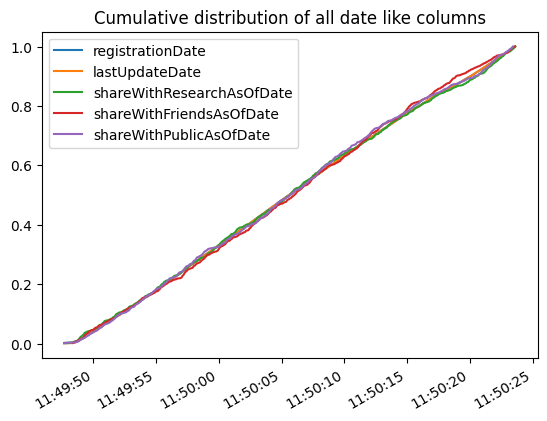

In [31]:
# Hows the (cumulative) distribution of all the dates?
times_df["registrationDate"].value_counts(normalize=True).sort_index().cumsum().plot(legend="Cumulative distribution of registrationDate");
times_df["lastUpdateDate"].value_counts(normalize=True).sort_index().cumsum().plot(legend="Cumulative distribution of lastUpdateDate");
times_df["shareWithResearchAsOfDate"].dropna().value_counts(normalize=True).sort_index().cumsum().plot(legend="Cumulative distribution of shareWithResearchAsOfDate");
times_df["shareWithFriendsAsOfDate"].dropna().value_counts(normalize=True).sort_index().cumsum().plot(legend="Cumulative distribution of shareWithFriendsAsOfDate");
times_df["shareWithPublicAsOfDate"].dropna().value_counts(normalize=True).sort_index().cumsum().plot(legend="Cumulative distribution of shareWithPublicAsOfDate", title="Cumulative distribution of all date like columns");

In [32]:
customer_landing_df[["email", "serialNumber", "registrationDate", "lastUpdateDate"]].drop_duplicates()

,email,serialNumber,registrationDate,lastUpdateDate
0,Frank.Doshi@test.com,159a908a-371e-40c1-ba92-dcdea483a6a2,1655293787680,1655293787680
1,Trevor.Lincoln@test.com,2bc01cbe-2ea2-4603-b91a-5989b915d392,1655293788365,1655293788365
2,Sean.Clayton@test.com,fc868710-172e-408b-895d-ba0a5406e4da,1655293788443,1655293788443
3,Neeraj.Anandh@test.com,2bc01cbe-2ea2-4603-b91a-5989b915d392,1655293788530,1655293788530
4,Travis.Spencer@test.com,94867fb9-570d-4031-b319-8a9d3b8c1c20,1655293788631,1655293788631
...,...,...,...,...
994,Jaya.Clayton@test.com,2e34a651-5e26-4280-b30b-9f2066496a89,1655293823480,1655293823480
995,Lyn.Jackson@test.com,b8a9332d-39f7-4994-a299-d60a747d288b,1655293823512,1655293823512
996,Larry.Staples@test.com,b8a9332d-39f7-4994-a299-d60a747d288b,1655293823548,1655293823548
997,Larry.Wu@test.com,41e55307-c7c3-4a9a-a607-61a8c1038456,1655293823586,1655293823586


## Creating the "Trusted Zone"

In [6]:
customer_trusted_df = customer_landing_df.dropna(subset=['shareWithResearchAsOfDate']).reset_index(drop=True)
customer_trusted_df

,customerName,email,phone,birthDay,serialNumber,registrationDate,lastUpdateDate,shareWithResearchAsOfDate,shareWithFriendsAsOfDate,shareWithPublicAsOfDate
0,Bobby Davis,Bobby.Davis@test.com,8015551212,1965-01-01,5d9bf1f7-0492-4bac-842b-3ed958fa5ba1,1655296152388,1655296205414,1.655296e+12,NaN,NaN
1,Larry Jones,Larry.Jones@test.com,8015551212,1963-01-01,773b5821-b992-4307-b738-d511b9e0a406,1655296153178,1655296205414,1.655296e+12,1.655296e+12,1.655296e+12
2,Jerry Smith,Jerry.Smith@test.com,8015551212,1961-01-01,51fe4a0b-84bf-4fd8-ac10-638481219601,1655296153350,1655296205414,1.655296e+12,1.655296e+12,1.655296e+12
3,Manoj Davis,Manoj.Davis@test.com,8015551212,1960-01-01,f3161efa-b3ab-49db-8561-f23e1ffc791f,1655296153394,1655296205414,1.655296e+12,NaN,NaN
4,Angie Hansen,Angie.Hansen@test.com,8015551212,1958-01-01,4215444e-7472-4c4c-af8a-0cbd79f56477,1655296153478,1655296205414,1.655296e+12,1.655296e+12,1.655296e+12
...,...,...,...,...,...,...,...,...,...,...
379689,Christina Jones,Christina.Jones@test.com,8015551212,982-01-01,4215444e-7472-4c4c-af8a-0cbd79f56477,1655296190554,1655296356743,1.655296e+12,1.655296e+12,1.655296e+12
379690,Jason Howard,Jason.Howard@test.com,8015551212,978-01-01,b2892f78-f4bb-49ec-87fc-09d0f443596e,1655296190716,1655296356743,1.655296e+12,NaN,1.655296e+12
379691,Ashley Lincoln,Ashley.Lincoln@test.com,8015551212,975-01-01,5d9bf1f7-0492-4bac-842b-3ed958fa5ba1,1655296190832,1655296356743,1.655296e+12,1.655296e+12,NaN
379692,Ben Davis,Ben.Davis@test.com,8015551212,973-01-01,17486ebd-4c5d-4e84-b592-d1765bacf628,1655296190911,1655296356744,1.655296e+12,NaN,1.655296e+12


In [7]:
customer_landing_df.groupby("email").agg({"email": "count", "shareWithResearchAsOfDate": "count"})

,email,shareWithResearchAsOfDate
email,,
Angie.Abram@test.com,20,11
Angie.Ahmed@test.com,2236,1106
Angie.Anandh@test.com,8,5
Angie.Anderson@test.com,761,380
Angie.Aristotle@test.com,1500,730
...,...,...
Trevor.Sanchez@test.com,26,14
Trevor.Smith@test.com,20,11
Trevor.Spencer@test.com,16,9


In [8]:
pd.merge(customer_trusted_df, accelerometer_landing_df, left_on="email", right_on="user", how="inner")

KeyboardInterrupt: 